In [1]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait')

In [80]:
?scale_x_log10

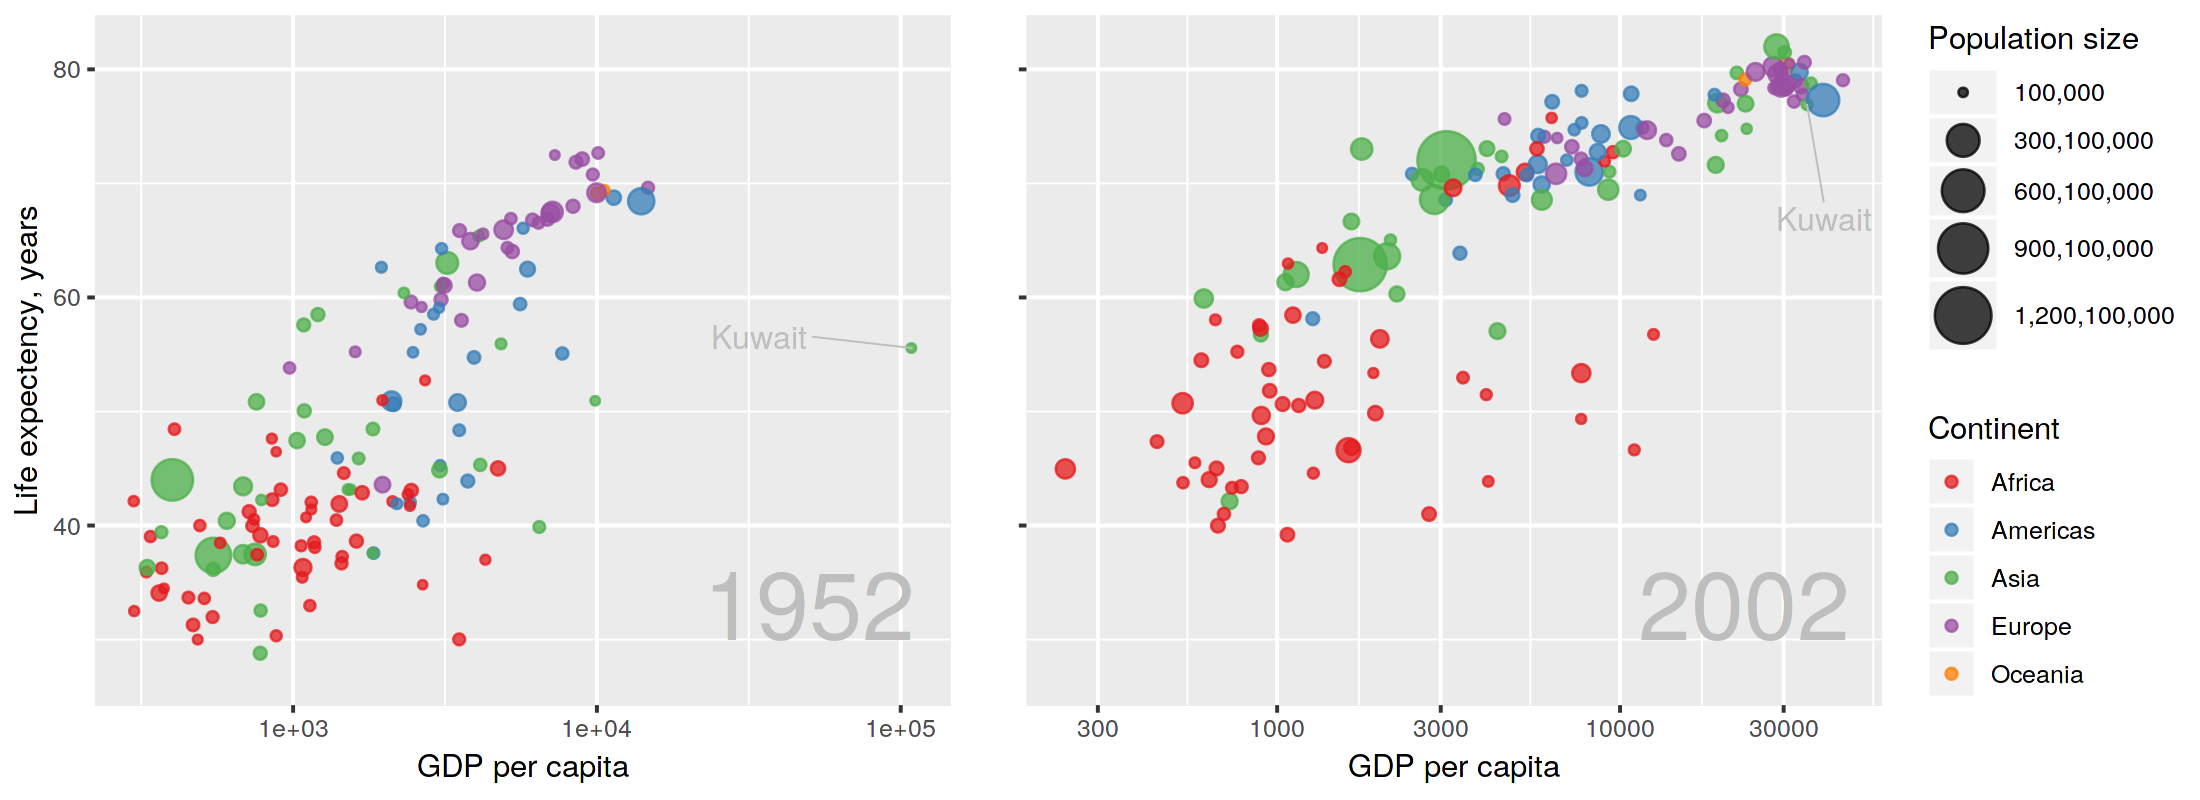

In [90]:
options(repr.plot.res = 200, repr.plot.width = 11, repr.plot.height = 4)

p = ggplot(df.1952, aes(x=gdpPercap, y=lifeExp, color=continent, size=pop)) 
p = p + geom_point(alpha = 0.75, show.legend = FALSE)
p = p + geom_text_repel(data=df.1952.kuwait,
                        segment.color = 'gray',
                        segment.size = 0.25,
                        nudge_x = -0.5,
                        nudge_y = 1,
                        aes(x = gdpPercap, y = lifeExp, label = country),
                        size = 4,
                        show.legend = FALSE,
                        color="gray")
p = p + annotate("text", x = 50000, y = 33, label = "1952", color="gray", size=12)
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
p = p + ylim(c(27, 82))
p = p + scale_x_log10()
p = p + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',
                                      '#ff7f00'))
p = p + labs(y='Life expectency, years', x= 'GDP per capita', size = "Population size", color = "Continent")

q = ggplot(df.2002, aes(x=gdpPercap, y=lifeExp, color=continent, size=pop))
q = q + geom_point(alpha = 0.75)
q = q + geom_text_repel(data=df.2002.kuwait,
                        segment.color = 'gray',
                        segment.size = 0.25,
                        nudge_x = 1,
                        nudge_y = -10,
                        aes(x = gdpPercap, y = lifeExp, label = country),
                        size = 4,
                        show.legend = FALSE,
                        color="gray")
q = q + theme(axis.text.y=element_blank())
q = q + annotate("text", x=23000, y=33, label="2002", color="gray", size=12)
q = q + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
q = q + ylim(c(27, 82))
q = q + scale_x_log10()
q = q + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',
                                      '#ff7f00'))
q = q + labs(x= 'GDP per capita', size = "Population size", color = "Continent")
q = q + ylab("")

p + q